In [1]:
#This cell must be in all notebooks!
#It allows us to run all the notebooks at once, this cell has a tag "parameters" which allows us to pass in 
# arguments externally using papermill (see mkfigs.sh for details)

### USER EDIT start
esm_file = "/g/data/ol01/access-om3-output/access-om3-025/MC_25km_jra_ryf-1.0-beta/experiment_datastore.json"
dpi=300
### USER EDIT stop

import os
from matplotlib import rcParams
%matplotlib inline
rcParams["figure.dpi"]= dpi

plotfolder=f"/g/data/{os.environ['PROJECT']}/{os.environ['USER']}/access-om3-paper-figs/"
os.makedirs(plotfolder, exist_ok=True)

 # a similar cell under this means it's being run in batch
print("ESM datastore path: ",esm_file)
print("Plot folder path: ",plotfolder)

ESM datastore path:  /g/data/ol01/access-om3-output/access-om3-025/MC_25km_jra_ryf-1.0-beta/experiment_datastore.json
Plot folder path:  /g/data/e14/txs156/access-om3-paper-figs/


In [2]:
import xarray as xr
import cf_xarray
import intake
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from distributed import Client

In [3]:
client = Client(threads_per_worker=1)
print(client.dashboard_link)

/proxy/8787/status


In [4]:
COLUMNS_WITH_ITERABLES = [
        "variable",
        "variable_long_name",
        "variable_standard_name",
        "variable_cell_methods",
        "variable_units"
]

datastore = intake.open_esm_datastore(
    esm_file,
    columns_with_iterables=COLUMNS_WITH_ITERABLES
)

In [5]:
def available_variables(datastore):
    """Return a pandas dataframe summarising the variables in a datastore"""
    variable_columns = [col for col in datastore.df.columns if "variable" in col]
    return (
        datastore.df[variable_columns]
        .explode(variable_columns)
        .drop_duplicates()
        .set_index("variable")
        .sort_index()
    )

In [70]:
datastore_filtered = datastore.search(realm="ocean", frequency="1mon")

available_variables(datastore_filtered)


,variable_long_name,variable_standard_name,variable_cell_methods,variable_units
variable,,,,
KE,Layer kinetic energy per unit mass,,area:mean z_l:mean yh:mean xh:mean time: mean,m2 s-2
SSH_max,Sea Surface Height,,area:mean yh:mean xh:mean time: max,m
SSH_min,Sea Surface Height,,area:mean yh:mean xh:mean time: min,m
agessc,Ideal Age Tracer,ideal_age_tracer,area:mean z_l:mean yh:mean xh:mean time: mean,yr
average_DT,Length of average period,,,days
average_T1,Start time for average period,,,days since 1900-01-01 00:00:00
average_T2,End time for average period,,,days since 1900-01-01 00:00:00
e,Interface Height Relative to Mean Sea Level,,area:mean rho2_i:point yh:mean xh:mean time: mean,m
hfds,Surface ocean heat flux from SW+LW+latent+sensible+masstransfer+frazil+seaice_melt_heat,surface_downward_heat_flux_in_sea_water,area:mean yh:mean xh:mean time: mean,W m-2


In [ ]:
hfds = datastore.search(variable="hfds", frequency="1mon").to_dask(
    xarray_combine_by_coords_kwargs = dict( # These kwargs can make things faster
        compat="override",
        data_vars="minimal",
        coords="minimal",
    ),
    xarray_open_kwargs = dict(
        chunks={"yh": -1, "xh": -1}, # Good for spatial operations, but not temporal
        decode_timedelta=True
    )
)

hfrainds = datastore.search(variable="hfrainds", frequency="1mon").to_dask(
    xarray_combine_by_coords_kwargs = dict( # These kwargs can make things faster
        compat="override",
        data_vars="minimal",
        coords="minimal",
    ),
    xarray_open_kwargs = dict(
        chunks={"yh": -1, "xh": -1}, # Good for spatial operations, but not temporal
        decode_timedelta=True
    )
)

hfrunoffds = datastore.search(variable="hfrunoffds", frequency="1mon").to_dask(
    xarray_combine_by_coords_kwargs = dict( # These kwargs can make things faster
        compat="override",
        data_vars="minimal",
        coords="minimal",
    ),
    xarray_open_kwargs = dict(
        chunks={"yh": -1, "xh": -1}, # Good for spatial operations, but not temporal
        decode_timedelta=True
    )
)

wfo = datastore.search(variable="wfo", frequency="1mon").to_dask(
    xarray_combine_by_coords_kwargs = dict( # These kwargs can make things faster
        compat="override",
        data_vars="minimal",
        coords="minimal",
    ),
    xarray_open_kwargs = dict(
        chunks={"yh": -1, "xh": -1}, # Good for spatial operations, but not temporal
        decode_timedelta=True
    )
)

temp = datastore.search(variable="temp", frequency="1mon").to_dask(
    xarray_combine_by_coords_kwargs = dict( # These kwargs can make things faster
        compat="override",
        data_vars="minimal",
        coords="minimal",
    ),
    xarray_open_kwargs = dict(
        chunks={"yh": -1, "xh": -1}, # Good for spatial operations, but not temporal
        decode_timedelta=True
    )
)

salt = datastore.search(variable="salt", frequency="1mon").to_dask(
    xarray_combine_by_coords_kwargs = dict( # These kwargs can make things faster
        compat="override",
        data_vars="minimal",
        coords="minimal",
    ),
    xarray_open_kwargs = dict(
        chunks={"yh": -1, "xh": -1}, # Good for spatial operations, but not temporal
        decode_timedelta=True
    )
)

areacello = datastore.search(variable="areacello", frequency="fx").to_dask(
    xarray_combine_by_coords_kwargs = dict( # These kwargs can make things faster
        compat="override",
        data_vars="minimal",
        coords="minimal",
    ),
    xarray_open_kwargs = dict(
        chunks={"yh": -1, "xh": -1}, # Good for spatial operations, but not temporal
        decode_timedelta=True
    )
)

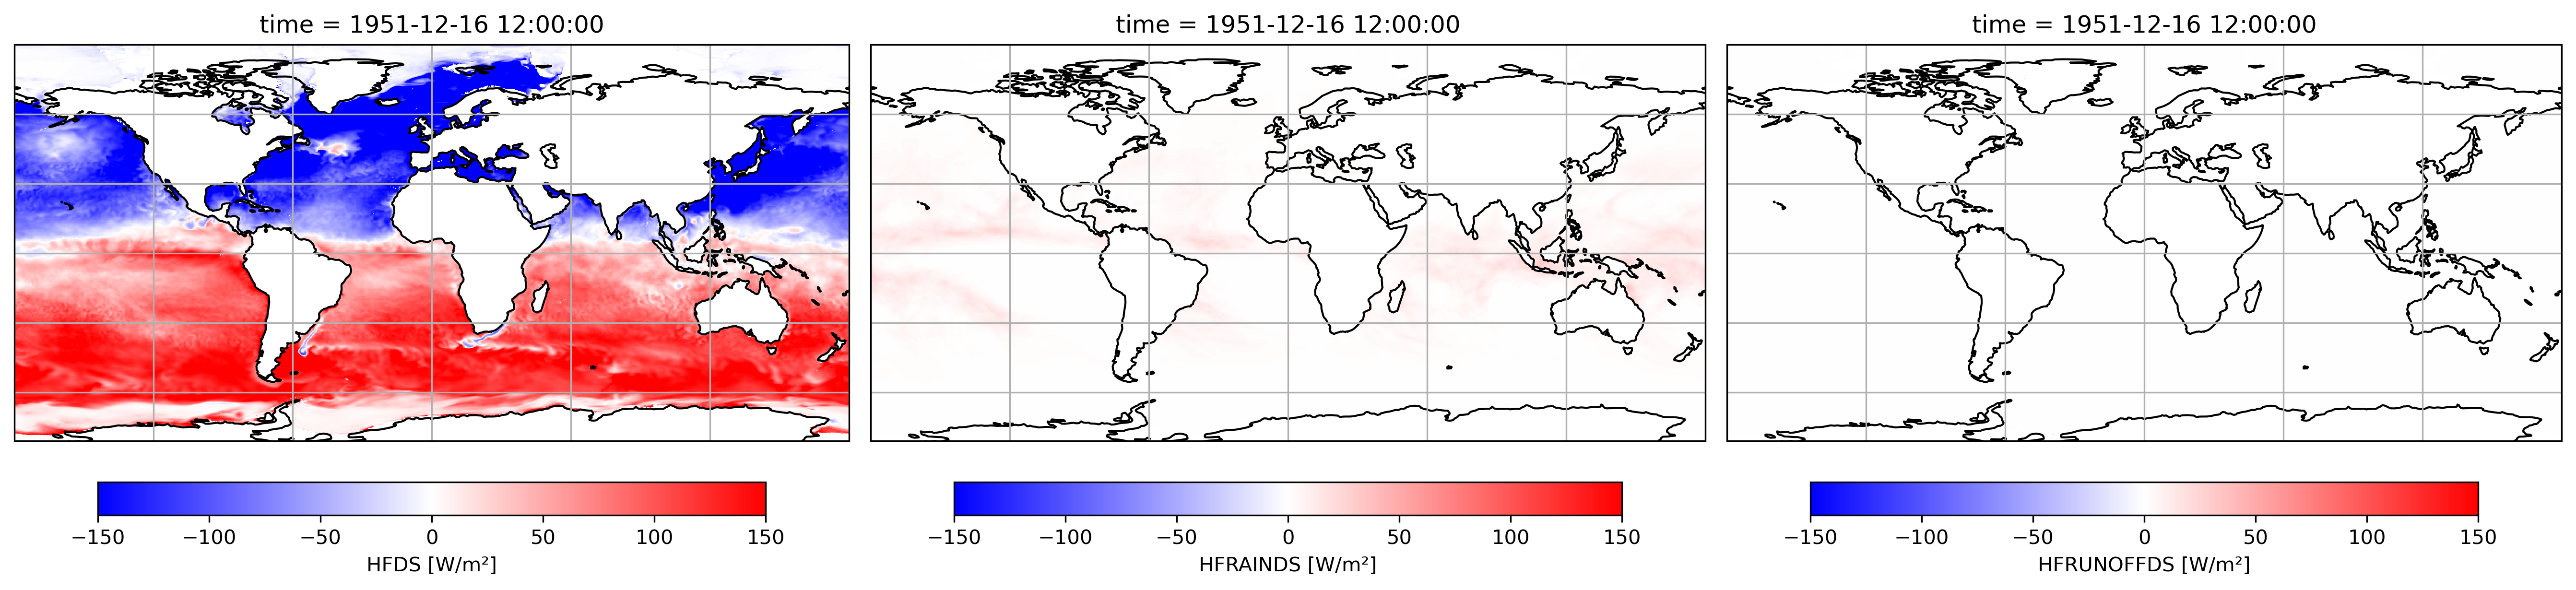

In [17]:
proj = ccrs.PlateCarree()
fig, axes = plt.subplots(1, 3, figsize=(18, 6), subplot_kw=dict(projection=proj))

ax, ax1, ax2 = axes

# --- Panel 1 ---
p1 = hfds["hfds"].isel(time=-1).plot(
    ax=ax, vmin=-150, vmax=150, cmap="bwr", add_colorbar=False
)
ax.coastlines()
ax.gridlines()

# Add colorbar under subplot
cbar1 = fig.colorbar(p1, ax=ax, orientation="horizontal", pad=0.05, shrink=0.8)
cbar1.set_label("HFDS [W/m²]")

# --- Panel 2 ---
p2 = hfrainds["hfrainds"].isel(time=-1).plot(
    ax=ax1, vmin=-150, vmax=150, cmap="bwr", add_colorbar=False
)
ax1.coastlines()
ax1.gridlines()

cbar2 = fig.colorbar(p2, ax=ax1, orientation="horizontal", pad=0.05, shrink=0.8)
cbar2.set_label("HFRAINDS [W/m²]")

# --- Panel 3 ---
p3 = hfrunoffds["hfrunoffds"].isel(time=-1).plot(
    ax=ax2, vmin=-150, vmax=150, cmap="bwr", add_colorbar=False
)
ax2.coastlines()
ax2.gridlines()

cbar3 = fig.colorbar(p3, ax=ax2, orientation="horizontal", pad=0.05, shrink=0.8)
cbar3.set_label("HFRUNOFFDS [W/m²]")

plt.tight_layout()
plt.show()

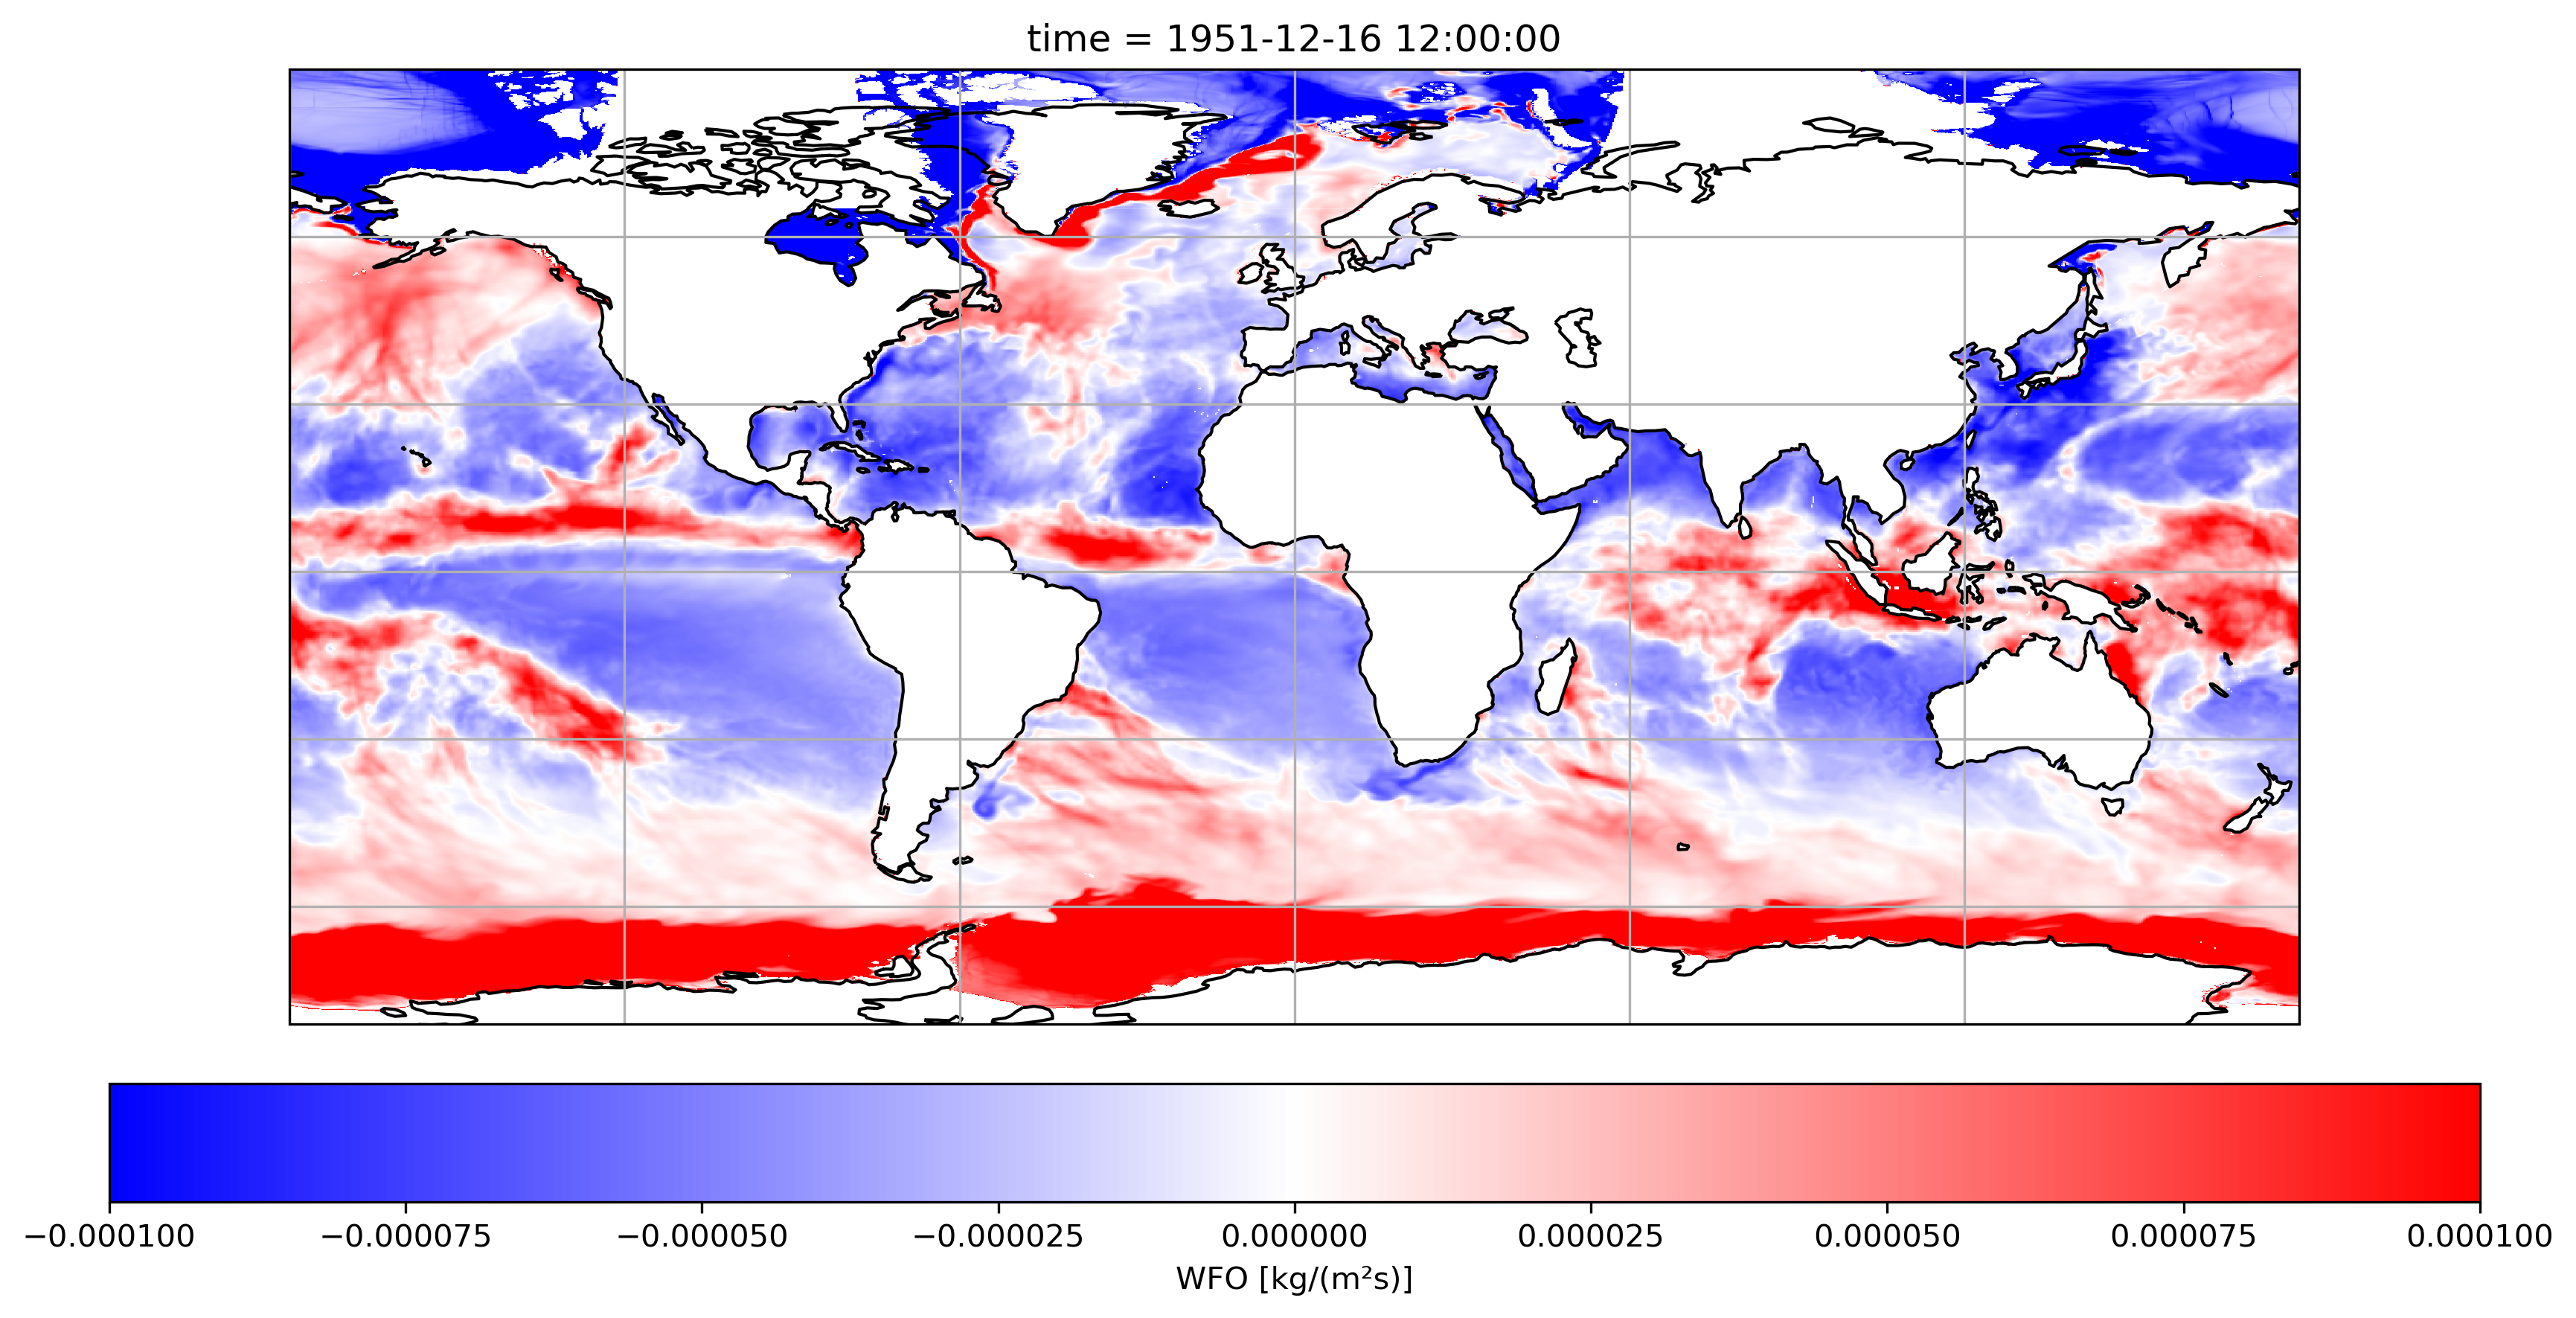

In [89]:
proj = ccrs.PlateCarree()
fig, ax = plt.subplots(1, 1, figsize=(18, 6), subplot_kw=dict(projection=proj))

# --- Panel 1 ---
p1 = wfo["wfo"].isel(time=-1).plot(
    ax=ax, vmin=-1e-4, vmax=1e-4, cmap="bwr", add_colorbar=False
)
ax.coastlines()
ax.gridlines()

# Add colorbar under subplot
cbar1 = fig.colorbar(p1, ax=ax, orientation="horizontal", pad=0.05, shrink=0.6)
cbar1.set_label("WFO [kg/(m²s)]")

plt.tight_layout()
plt.show()

In [90]:
import numpy as np
days_per_month = np.array([31,28,31,30,31,30,31,31,30,31,30,31])
seconds_per_month = days_per_month * 24 * 3600

n = hfds.time.size
seconds_per_month_repeated = np.tile(seconds_per_month, n // 12)

# If n is not exactly divisible by 12:
seconds_per_month_repeated = seconds_per_month_repeated[:n]

seconds_per_month_da = xr.DataArray(
    seconds_per_month_repeated,
    dims=["time"],
    coords={"time": hfds.time},
    name="seconds_per_month"
)

total_hfds = (hfds["hfds"]*areacello["areacello"]*seconds_per_month_da).sum(['yh', 'xh']) #units: J
total_hfrunoffds = (hfrunoffds["hfrunoffds"]*areacello["areacello"]*seconds_per_month_da).sum(['yh', 'xh']) #units: J
total_hfrainds = (hfrainds["hfrainds"]*areacello["areacello"]*seconds_per_month_da).sum(['yh', 'xh']) #units: J
total_wfo = (wfo["wfo"]*areacello["areacello"]*seconds_per_month_da).sum(['yh', 'xh']) #units: kg


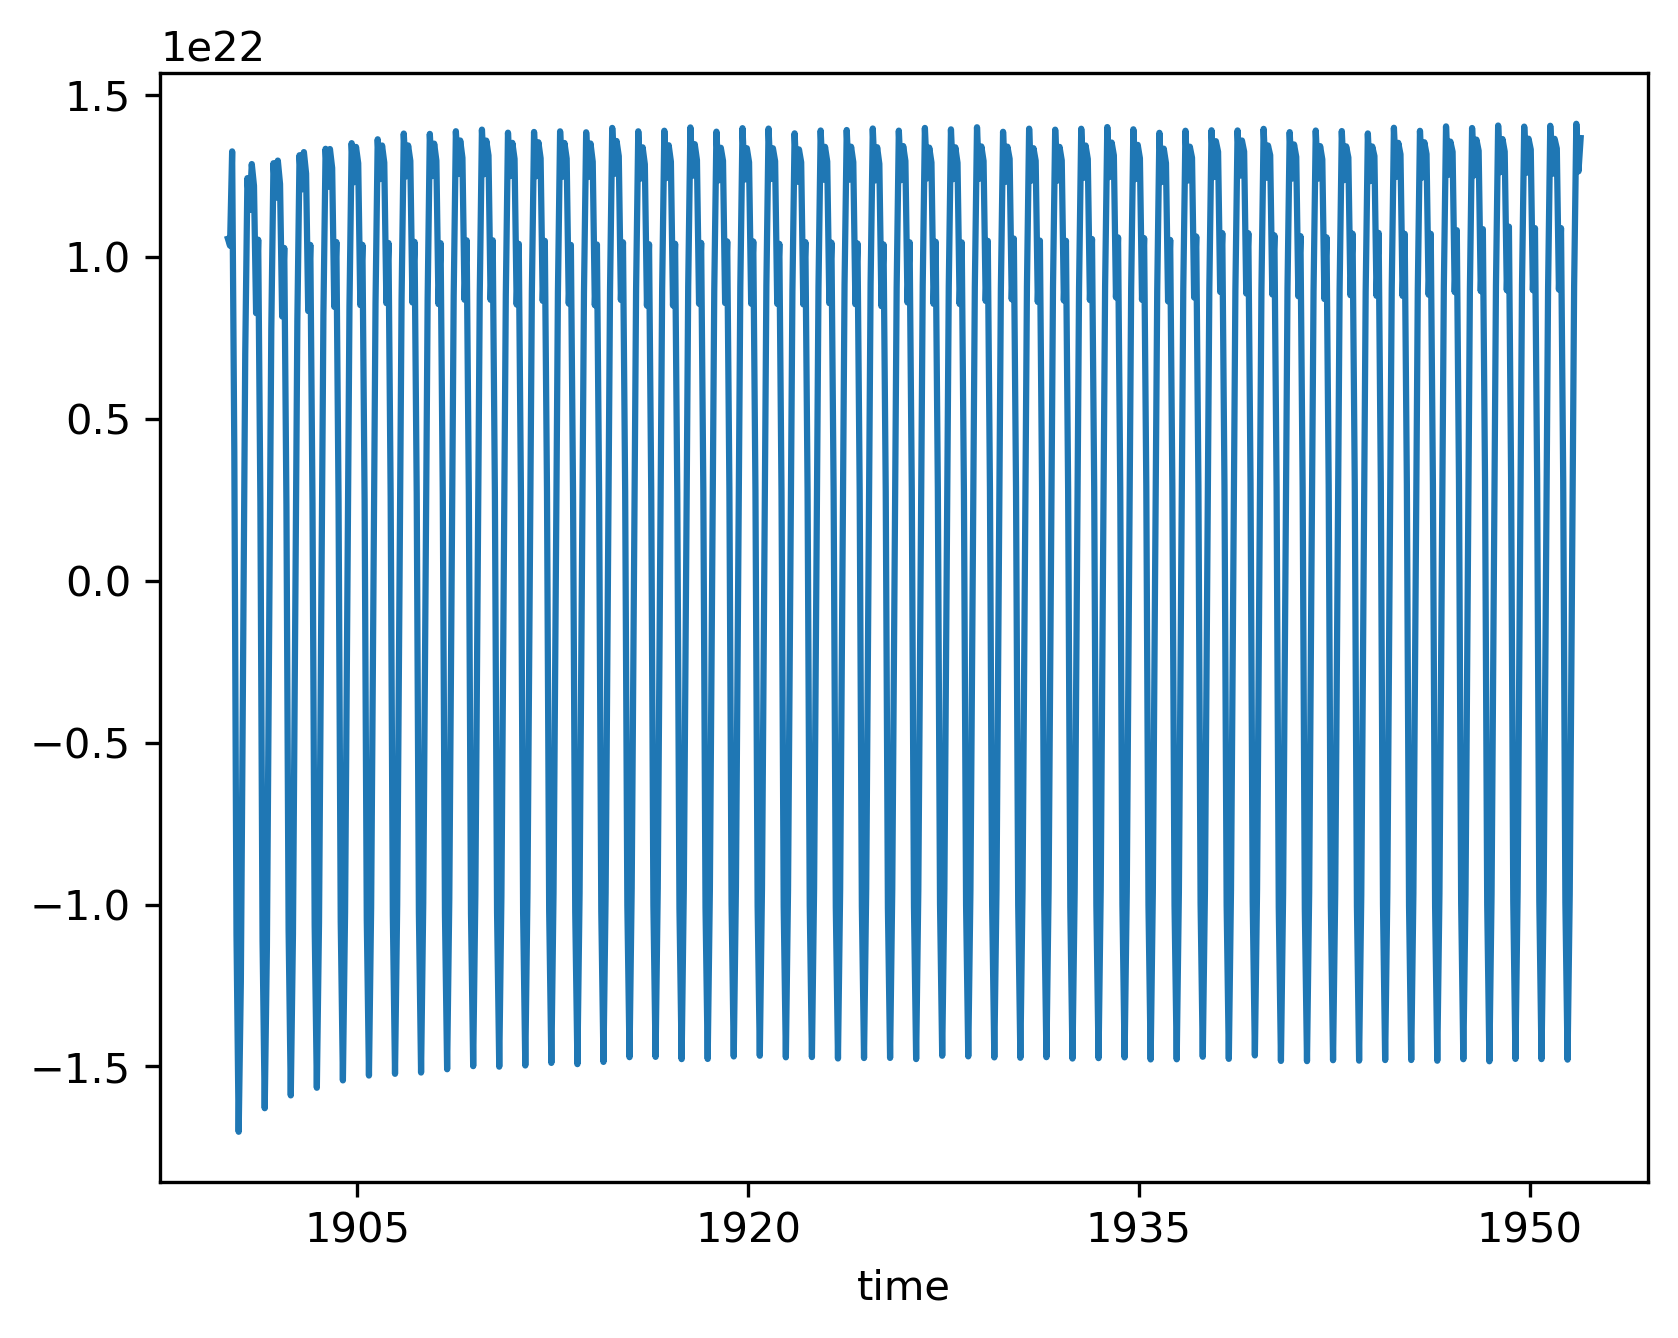

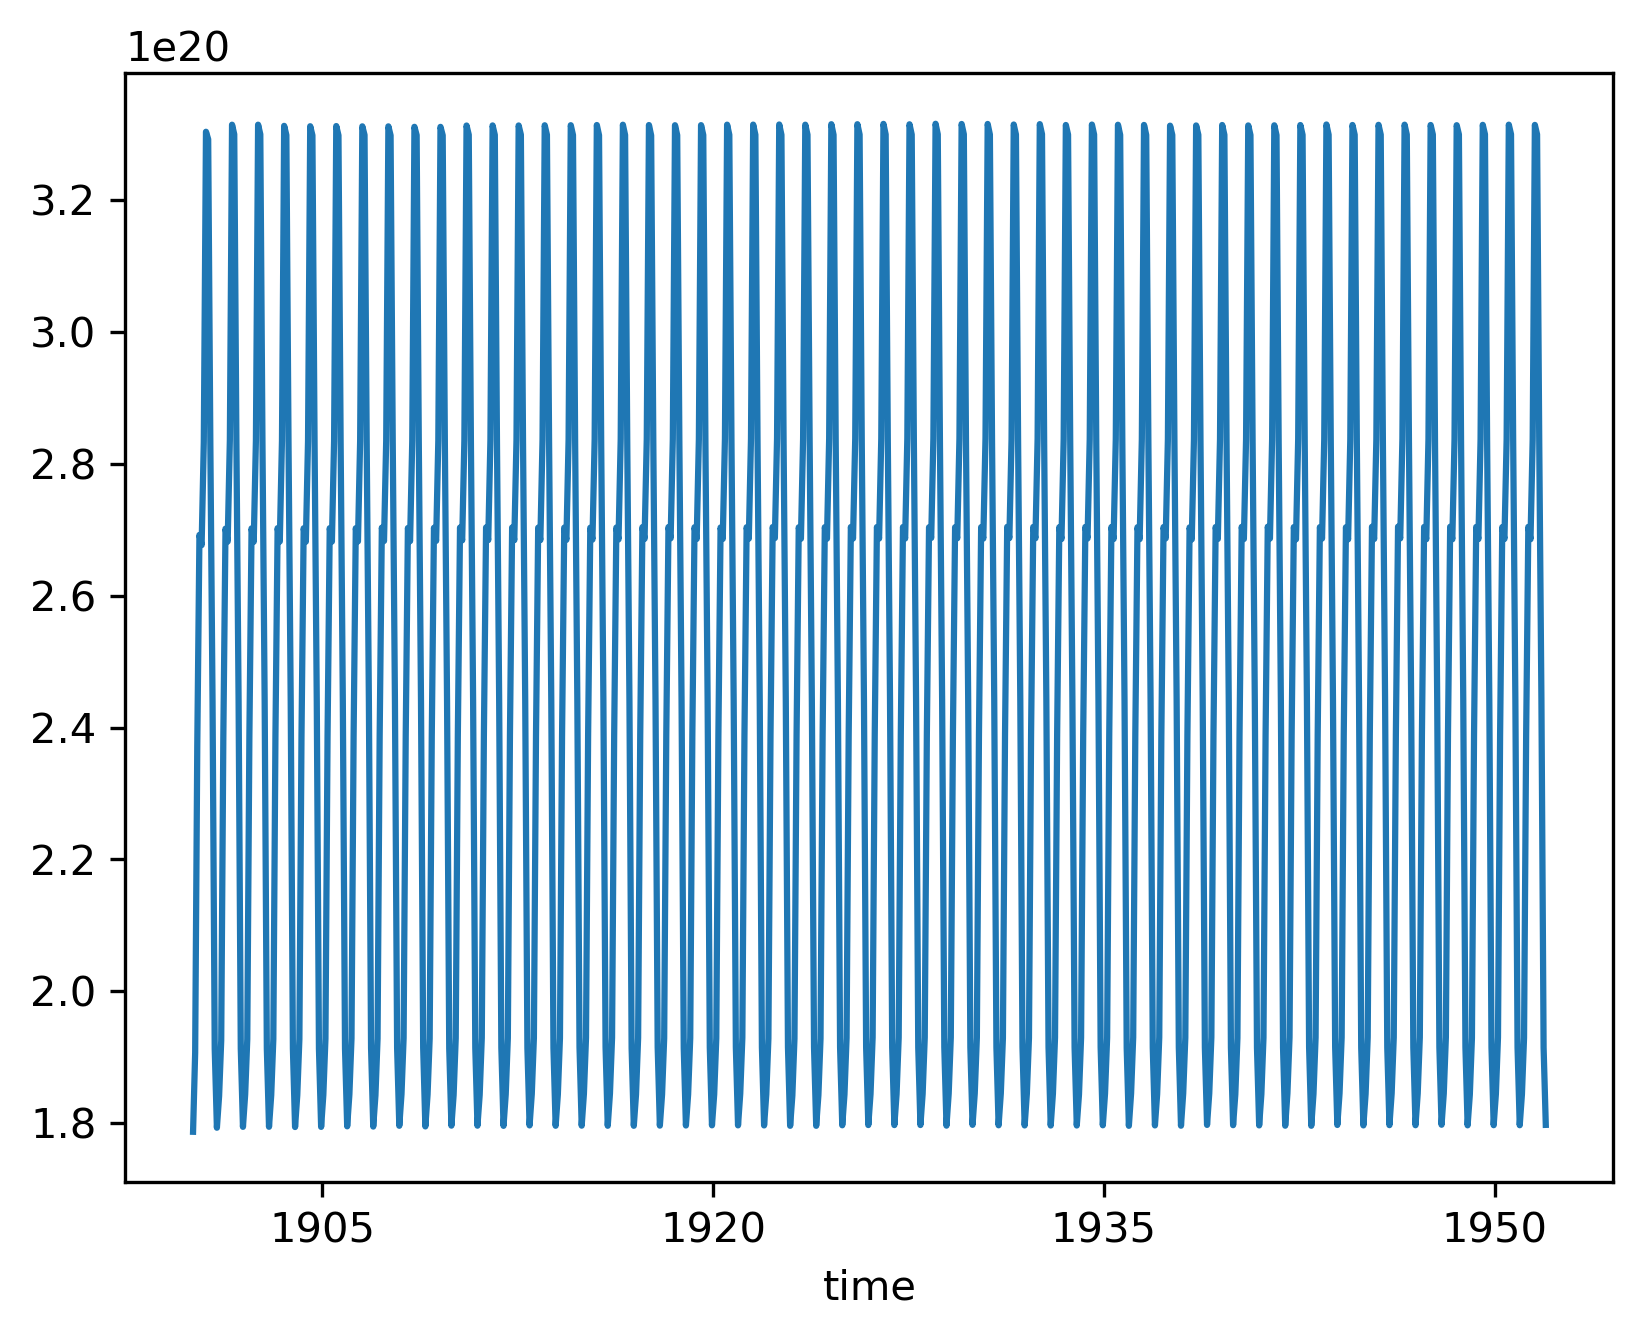

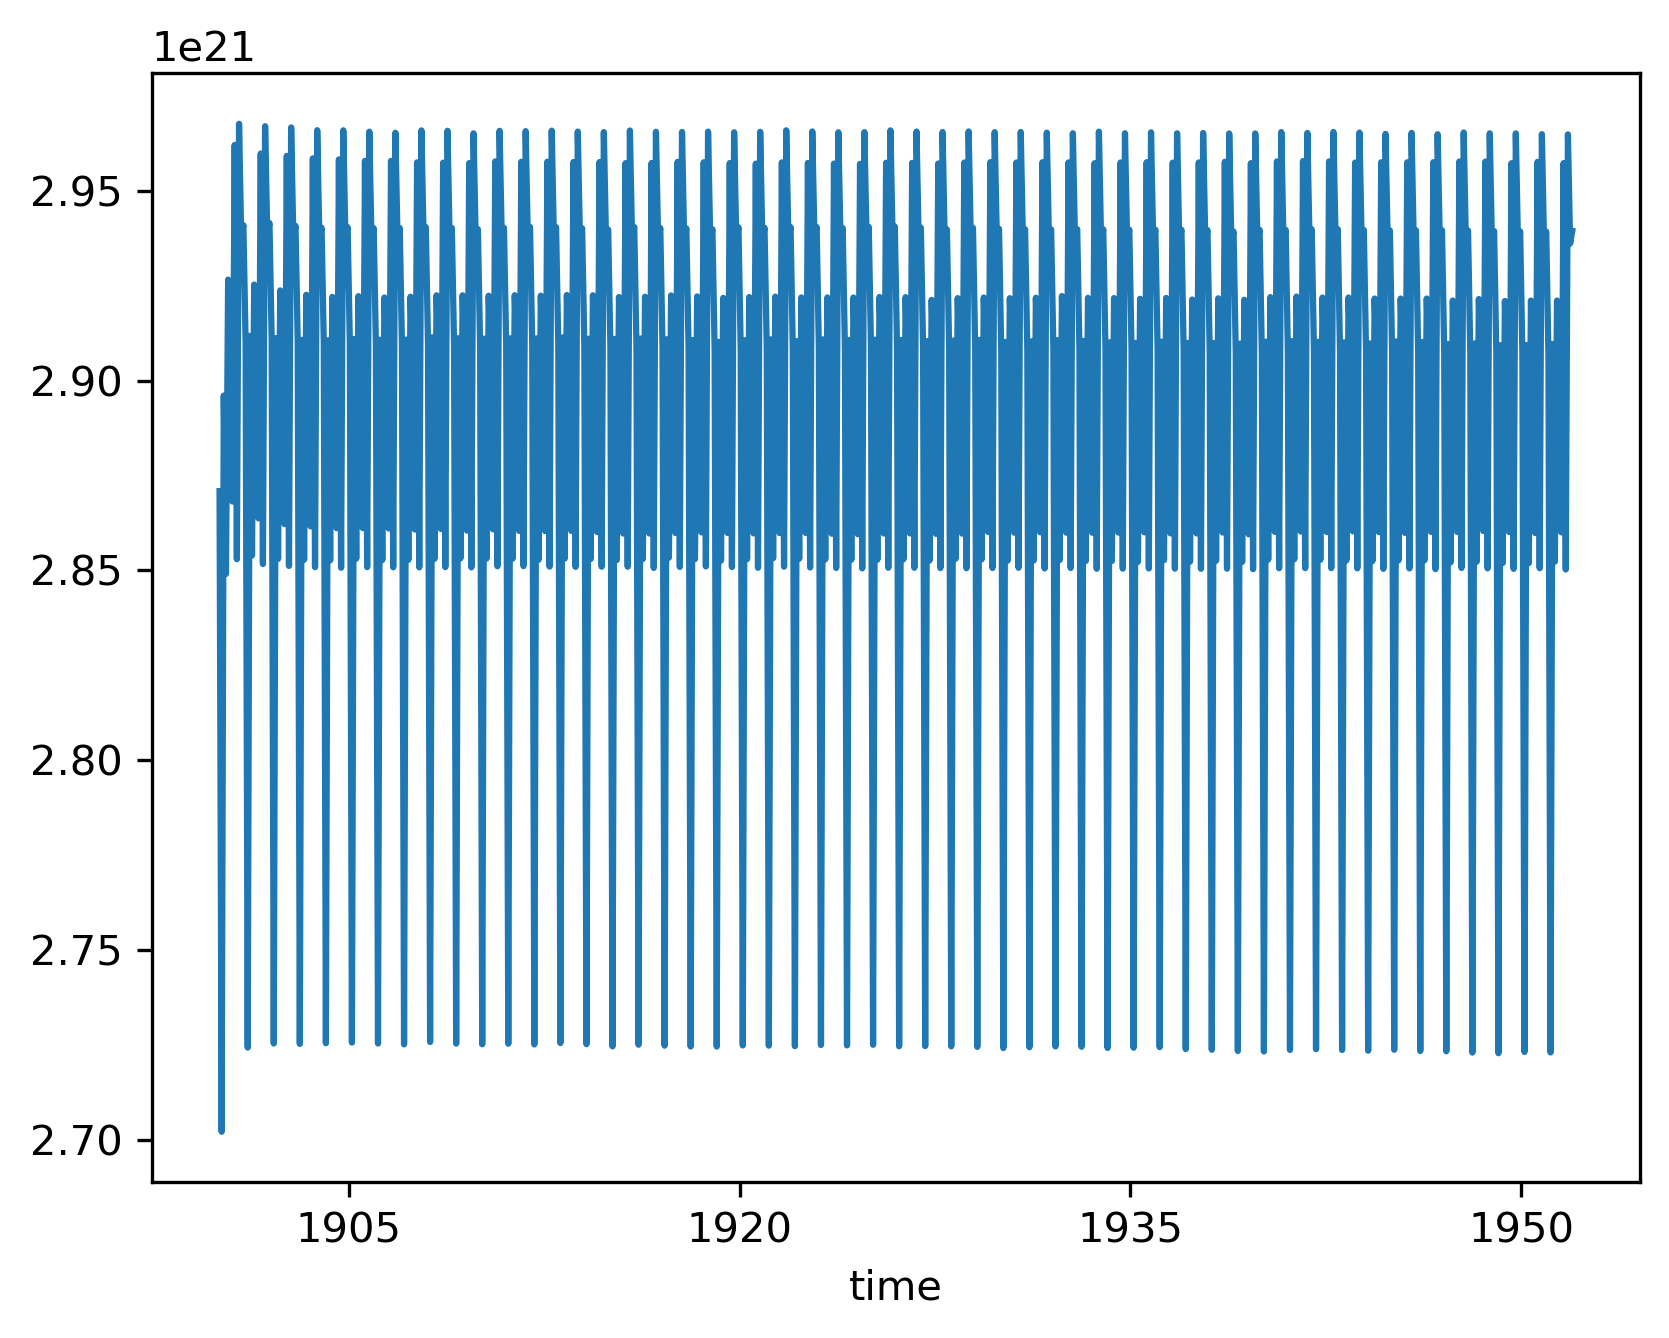

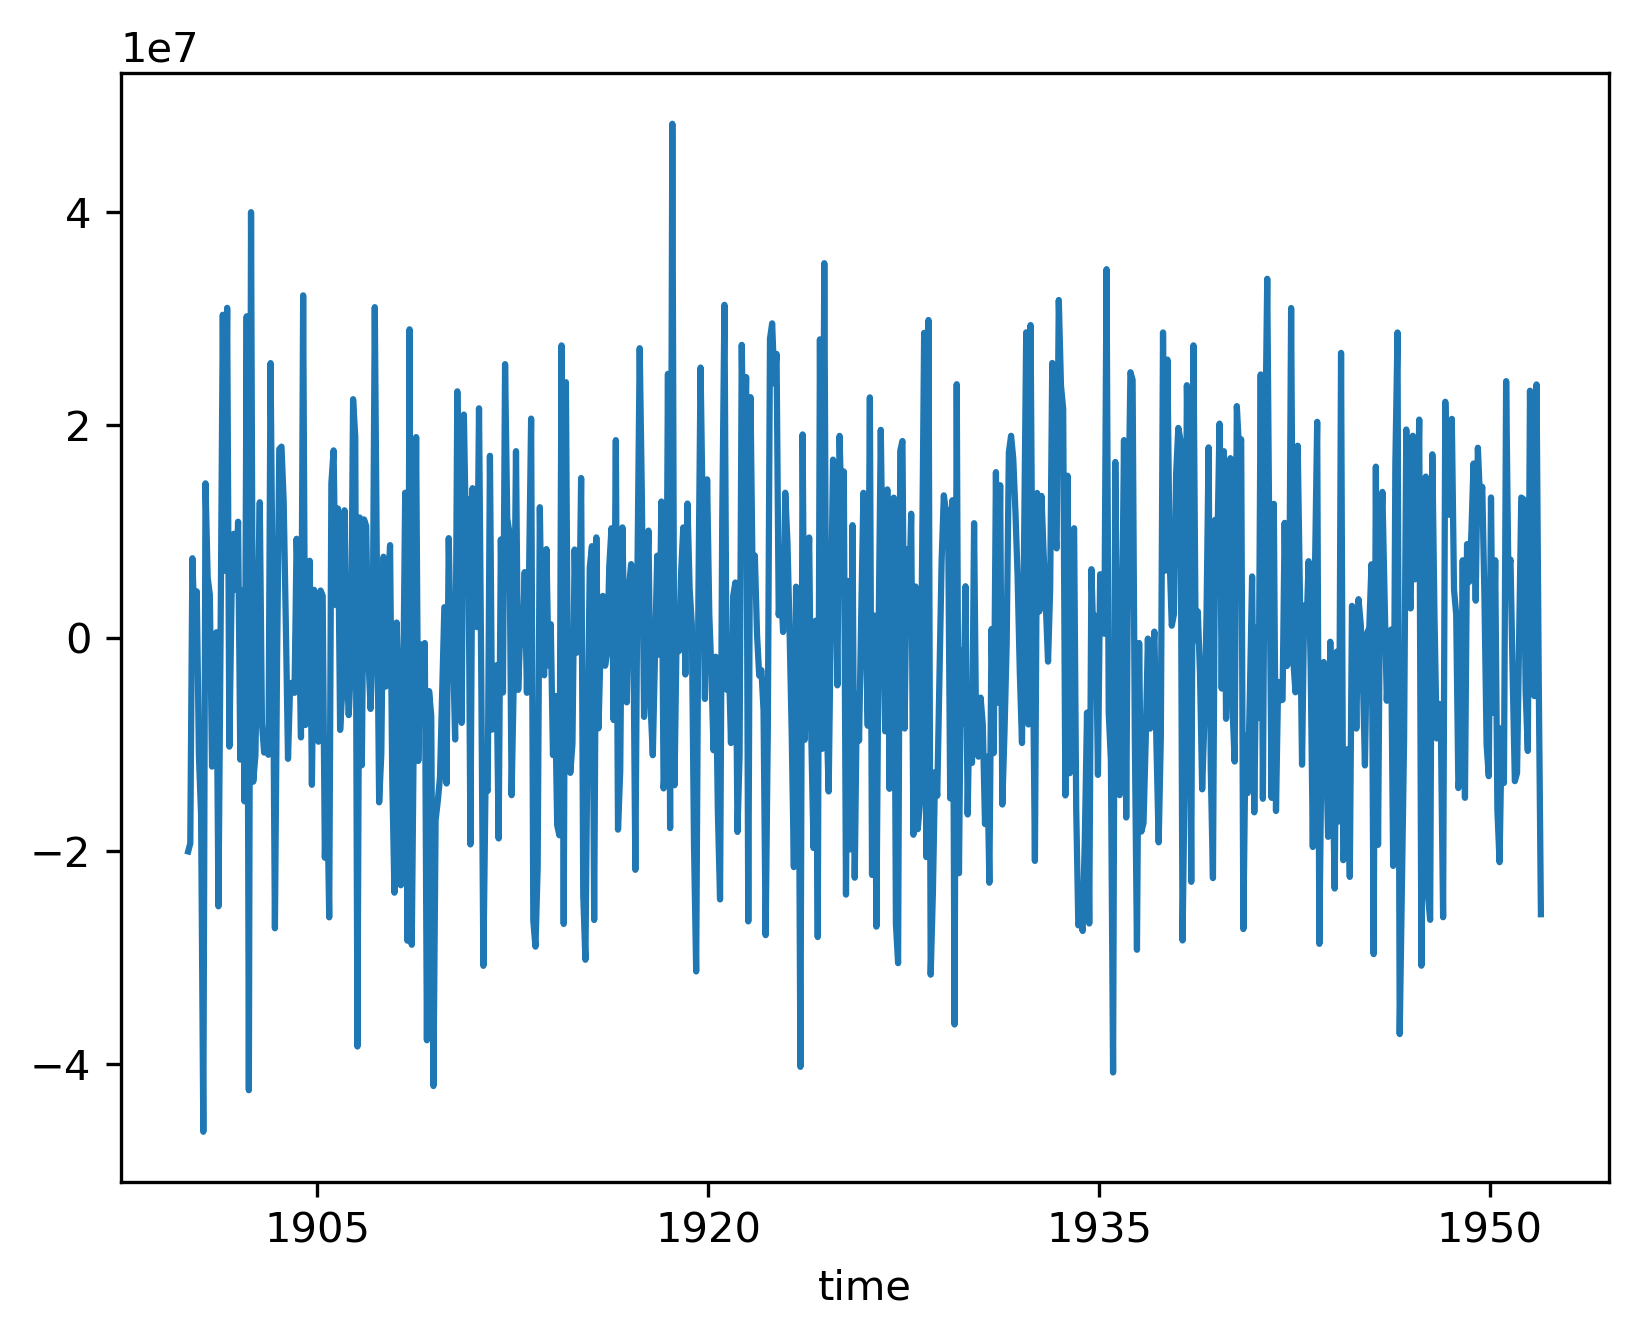

In [91]:
total_hfds.plot()
plt.show()
total_hfrunoffds.plot()
plt.show()
total_hfrainds.plot()
plt.show()
total_wfo.plot()
plt.show()